<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/Copy_of_15_1_2_THEORY_MLP_for_images_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP for images with Keras

In this notebook I will show you how to build and train a MLP for image classification and regression usign MNIST dataset.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

%matplotlib inline

## Load the data

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f'x_train.shape = {x_train.shape} - y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape} - y_test.shape = {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape = (60000, 28, 28) - y_train.shape = (60000,)
x_test.shape = (10000, 28, 28) - y_test.shape = (10000,)


In [ ]:
len(x_train[0])

28

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Feature Engineering

In [ ]:
# It's common to use MinMax(0,1) normalization for images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255

# We can feed our MLP with squared images, we must flatten them first
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
print(f'New x_train.shape: {x_train.shape}')
print(f'New x_test.shape: {x_test.shape}')


New x_train.shape: (60000, 784)
New x_test.shape: (10000, 784)


In [ ]:
x_train[0].shape

(784,)

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

plt.gray()

@interact(i=(0, len(x_train)-1))
def show_image(i):
    plt.imshow(x_train[i].reshape(28, 28))
    plt.title(y_train[i])
    plt.show()

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=29999, description='i', max=59999), Output()), _dom_classes=('widget-int…

## Building the model

It will have:

    - 2 hidden layers with 16 neurons each
    - 1 output layer with 10 neurons (1 for each class)
    - Batch size of 32 during training


In [ ]:
x_train[0].shape

(784,)

In [ ]:
input_shape = x_train[0].shape

# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(10, activation='softmax')
    ]
)

# Now we must compile it
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print('Summary:')
model.summary()

Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(784+1)*16 + (16+1)*16 + (16+1)*10

13002

### Training the model

In [ ]:
print("\nTraining...")
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[
      keras.callbacks.EarlyStopping(patience=2),
      keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                                      save_best_only=True)

    ]
)


Training...
Epoch 1/15
1478/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.9891

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6780 - loss: 0.9836 - val_accuracy: 0.9198 - val_loss: 0.2839
Epoch 2/15
1485/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.3490

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8937 - loss: 0.3488 - val_accuracy: 0.9392 - val_loss: 0.2170
Epoch 3/15
1487/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9127 - loss: 0.2887

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9127 - loss: 0.2887 - val_accuracy: 0.9433 - val_loss: 0.1996
Epoch 4/15
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9233 - loss: 0.2601

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9233 - loss: 0.2601 - val_accuracy: 0.9458 - val_loss: 0.1939
Epoch 5/15
1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9279 - loss: 0.2405

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9279 - loss: 0.2405 - val_accuracy: 0.9479 - val_loss: 0.1870
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9353 - loss: 0.2193 - val_accuracy: 0.9454 - val_loss: 0.1935
Epoch 7/15
1487/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9393 - loss: 0.2057

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9393 - loss: 0.2057 - val_accuracy: 0.9488 - val_loss: 0.1811
Epoch 8/15
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9391 - loss: 0.1996

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9391 - loss: 0.1996 - val_accuracy: 0.9542 - val_loss: 0.1647
Epoch 9/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9430 - loss: 0.1923 - val_accuracy: 0.9537 - val_loss: 0.1655
Epoch 10/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9450 - loss: 0.1852 - val_accuracy: 0.9528 - val_loss: 0.1709


### Let's see some plots

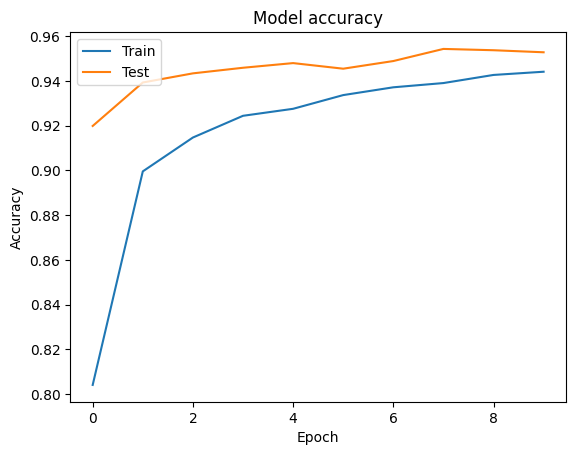

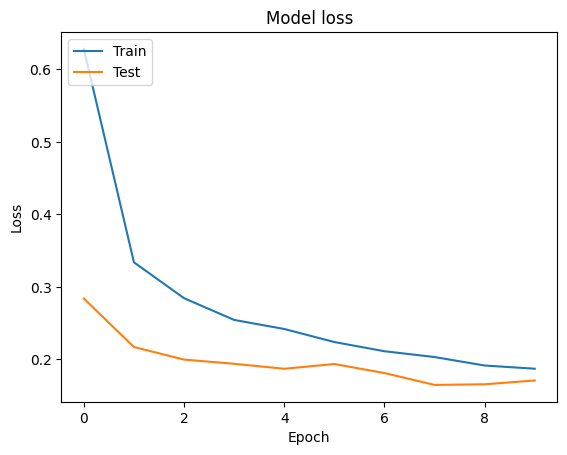

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Using the model


In [ ]:
x_test[0].shape

(784,)

In [ ]:
x_test[0].reshape(1, -1).shape

(1, 784)

In [ ]:
prediction = model.predict(x_test[0].reshape(1, -1))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


array([[3.8062120e-05, 2.5495631e-06, 5.9006299e-04, 1.2695950e-03,
        4.1227936e-06, 8.4286330e-05, 3.6141203e-06, 9.9770856e-01,
        4.1140956e-05, 2.5801727e-04]], dtype=float32)

In [ ]:
pred_class = prediction.argmax(axis=1)[0]
pred_class

7

In [ ]:
prediction[0][pred_class]

0.99770856

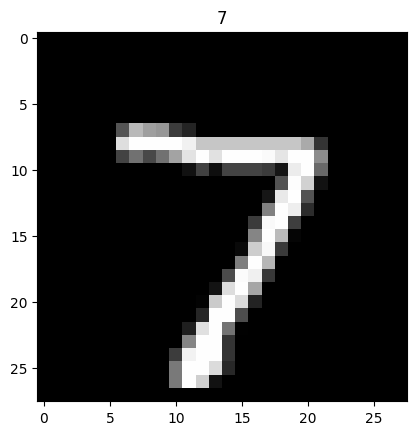

In [ ]:
plt.imshow(x_test[0].reshape(28, 28))
plt.title(y_test[0])
plt.show()

Evaluate the model on all the testing set, never used yet

In [ ]:
# Predict over test
y_test_pred = model.predict(x_test)

# Get predicted class from probabilities
y_test_pred_cat = y_test_pred.argmax(axis=1)

# Evaluamos el accuracy score
accuracy_score(y_true=y_test, y_pred=y_test_pred_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9511

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_cat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.96      0.93      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.96      0.94      0.95       892
           6       0.95      0.96      0.96       958
           7       0.94      0.96      0.95      1028
           8       0.94      0.93      0.94       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



---

# MLP for regression

Let's now think this problem as a regression. We will predict one number between 0 and 9 instead a of class.


In [ ]:
# Input shape will be the same
input_shape = x_train[0].shape

# Output shape now is different!
# Note: Activation function in the output layer
# can't be softmax in this case
num_classes = 1

# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='linear')
    ]
)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

print('Summary:')
model.summary()


Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,849 (50.19 KB)

 Trainable params: 12,849 (50.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nTraining...")
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
)



Training...
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.3212 - mae: 1.7070 - val_loss: 1.6706 - val_mae: 0.9462
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5818 - mae: 0.8933 - val_loss: 1.2273 - val_mae: 0.7630
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1737 - mae: 0.7500 - val_loss: 1.1274 - val_mae: 0.7159
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.0623 - mae: 0.6979 - val_loss: 0.9970 - val_mae: 0.6593
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.9453 - mae: 0.6502 - val_loss: 0.9449 - val_mae: 0.6390
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9155 - mae: 0.6362 - val_loss: 0.8946 - val_mae: 0.6082
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.8693 - mae: 0.6124 - val_loss: 0.8856 - val_mae: 0.5971
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8019 - mae: 0.5860 - val_loss: 0.8706 - val_mae: 0.5918
Epoch 9/15
1500/1500 ━━━━━━

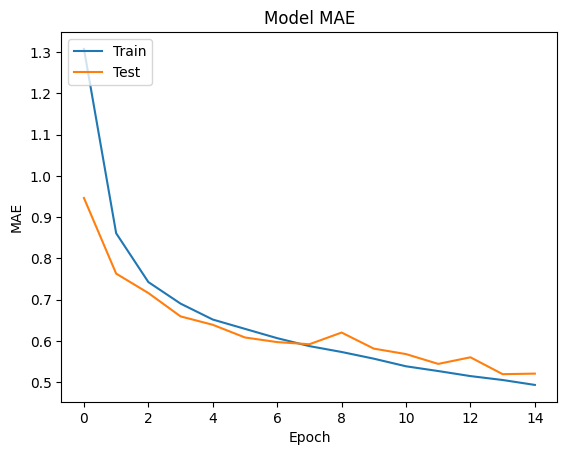

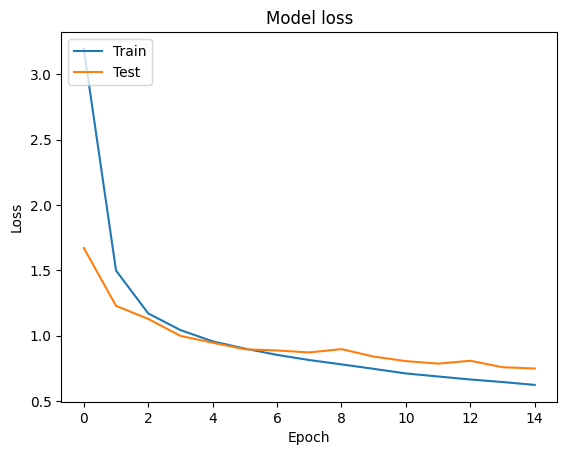

In [ ]:
# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(x_test[1].reshape(1, -1))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([[1.7586448]], dtype=float32)

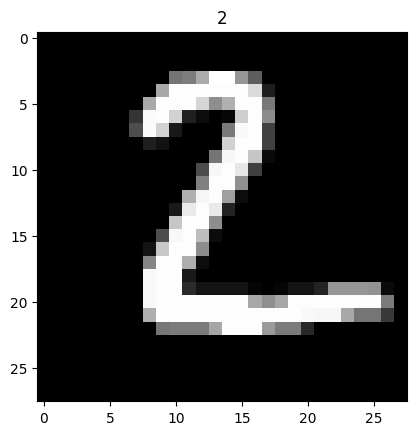

In [ ]:
plt.imshow(x_test[1].reshape(28, 28))
plt.title(y_test[1])
plt.show()